In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


In [8]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge transactions with products
transactions_products = transactions.merge(products, on='ProductID')

# Merge the above with customers
data = transactions_products.merge(customers, on='CustomerID')

# Preview the merged dataset
print(data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

In [10]:
# Ensure transactions DataFrame is loaded
transactions = pd.read_csv('Transactions.csv')

# Aggregate transaction features per customer
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],  # Total and average transaction value
    'Quantity': 'sum',             # Total quantity purchased
}).reset_index()

# Rename the columns for clarity
customer_features.columns = ['CustomerID', 'TotalSpend', 'AvgSpend', 'TotalQuantity']

# Display the resulting DataFrame
print(customer_features.head())


  CustomerID  TotalSpend  AvgSpend  TotalQuantity
0      C0001     3354.52   670.904             12
1      C0002     1862.74   465.685             10
2      C0003     2725.38   681.345             14
3      C0004     5354.88   669.360             23
4      C0005     2034.24   678.080              7


In [11]:
# Ensure customers DataFrame is loaded
customers = pd.read_csv('Customers.csv')

# Merge customer profile with aggregated transaction features
customer_data = customers.merge(customer_features, on='CustomerID', how='inner')

# Display the merged dataset
print(customer_data.head())


  CustomerID        CustomerName         Region  SignupDate  TotalSpend  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   AvgSpend  TotalQuantity  
0   670.904             12  
1   465.685             10  
2   681.345             14  
3   669.360             23  
4   678.080              7  


In [12]:
# Check for missing data
print(customer_data.isnull().sum())

# Drop or fill missing values if necessary
customer_data = customer_data.dropna()  # Example: drop rows with missing data


CustomerID       0
CustomerName     0
Region           0
SignupDate       0
TotalSpend       0
AvgSpend         0
TotalQuantity    0
dtype: int64


In [13]:
# Merge customer profile with transaction features
customer_data = customers.merge(customer_features, on='CustomerID', how='inner')

# Display the merged dataset
print(customer_data.head())


  CustomerID        CustomerName         Region  SignupDate  TotalSpend  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   AvgSpend  TotalQuantity  
0   670.904             12  
1   465.685             10  
2   681.345             14  
3   669.360             23  
4   678.080              7  


In [15]:
print(customer_features.columns)


Index(['CustomerID', 'TotalSpend', 'AvgSpend', 'TotalQuantity'], dtype='object')


In [16]:
# Calculate AvgPrice for each customer (mean of product prices in each transaction)
avg_price = transactions.groupby('CustomerID')['Price'].mean().reset_index()
avg_price.columns = ['CustomerID', 'AvgPrice']

# Merge the AvgPrice with the customer_features
customer_features = customer_features.merge(avg_price, on='CustomerID', how='inner')

# Display the updated customer_features with AvgPrice
print(customer_features.head())


  CustomerID  TotalSpend  AvgSpend  TotalQuantity    AvgPrice
0      C0001     3354.52   670.904             12  278.334000
1      C0002     1862.74   465.685             10  208.920000
2      C0003     2725.38   681.345             14  195.707500
3      C0004     5354.88   669.360             23  240.636250
4      C0005     2034.24   678.080              7  291.603333


In [17]:
customer_data = customers.merge(customer_features, on='CustomerID', how='inner')

# Display the merged customer data
print(customer_data.head())


  CustomerID        CustomerName         Region  SignupDate  TotalSpend  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   AvgSpend  TotalQuantity    AvgPrice  
0   670.904             12  278.334000  
1   465.685             10  208.920000  
2   681.345             14  195.707500  
3   669.360             23  240.636250  
4   678.080              7  291.603333  


In [18]:
# Select relevant features for clustering
clustering_data = customer_data[['TotalSpend', 'AvgSpend', 'TotalQuantity', 'AvgPrice']]

# Handle missing or NaN values if any
clustering_data.fillna(0, inplace=True)

# Normalize the data (important for clustering algorithms)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Display normalized clustering data
print(clustering_data_normalized[:5])  # Print the first 5 rows


[[-0.06170143 -0.07026341 -0.12203296  0.09467022]
 [-0.87774353 -0.93493297 -0.44800021 -0.90401592]
 [-0.40585722 -0.02627131  0.20393428 -1.09410928]
 [ 1.03254704 -0.0767689   1.67078689 -0.44770193]
 [-0.78392861 -0.04002806 -0.93695108  0.28558127]]


<ipython-input-18-adc4f4518671>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data.fillna(0, inplace=True)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


**Step 2: Apply Clustering**

In [20]:
from sklearn.cluster import KMeans

# Define the range for k
k_range = range(2, 11)

# Store results for evaluation
db_indices = []
kmeans_models = []

# Loop through different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_scaled)
    kmeans_models.append(kmeans)

    # Calculate Davies-Bouldin Index
    from sklearn.metrics import davies_bouldin_score
    db_index = davies_bouldin_score(clustering_data_scaled, kmeans.labels_)
    db_indices.append(db_index)


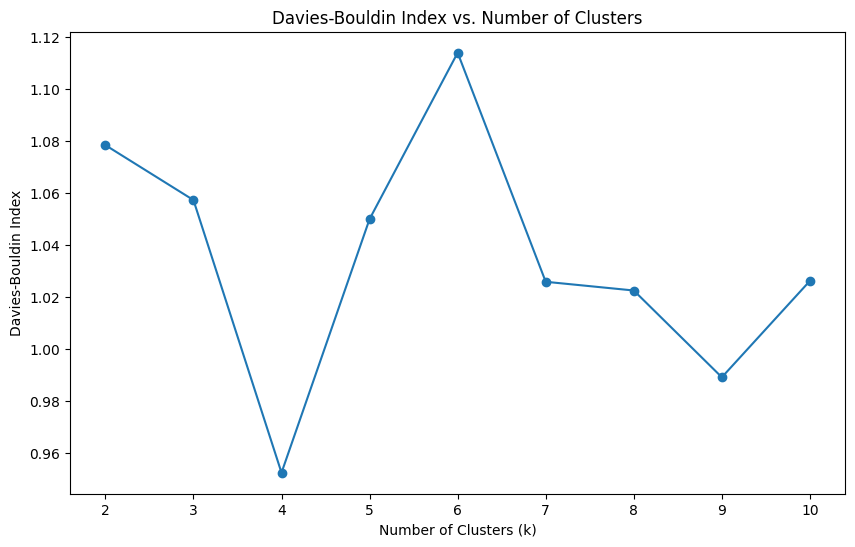

Optimal number of clusters: 4


In [21]:
import matplotlib.pyplot as plt

# Plot Davies-Bouldin Index vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_indices, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Choose the best k (minimum DB Index)
optimal_k = k_range[db_indices.index(min(db_indices))]
print(f"Optimal number of clusters: {optimal_k}")


In [22]:
# Perform clustering with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_kmeans.fit(clustering_data_scaled)

# Assign cluster labels to the customers
customer_data['Cluster'] = final_kmeans.labels_


**Step 3: Visualize Clusters**

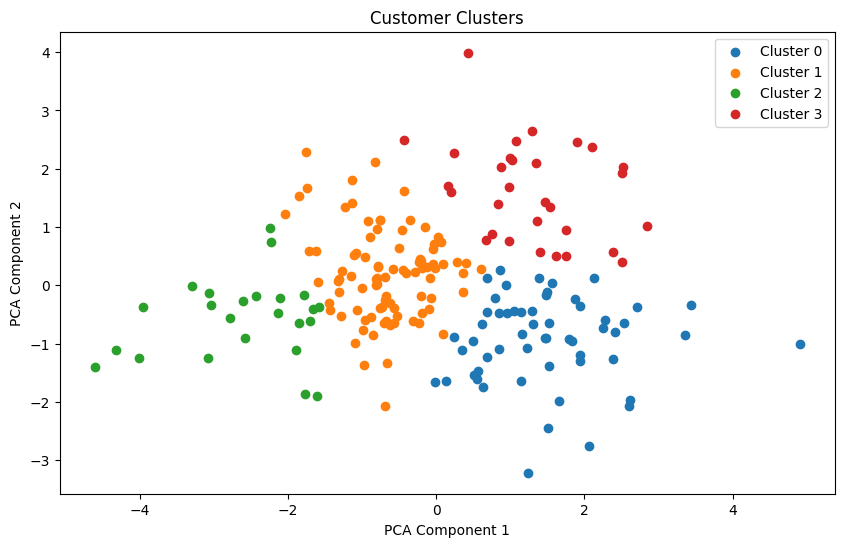

In [23]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
clustering_data_2d = pca.fit_transform(clustering_data_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = clustering_data_2d[customer_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Customer Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import davies_bouldin_score

# Assuming your data is stored in a dataframe `clustering_data` and you have the cluster labels
# Let's assume you are using KMeans as an example
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_labels = kmeans.fit_predict(clustering_data)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(clustering_data, clustering_labels)

print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.6063374123023849


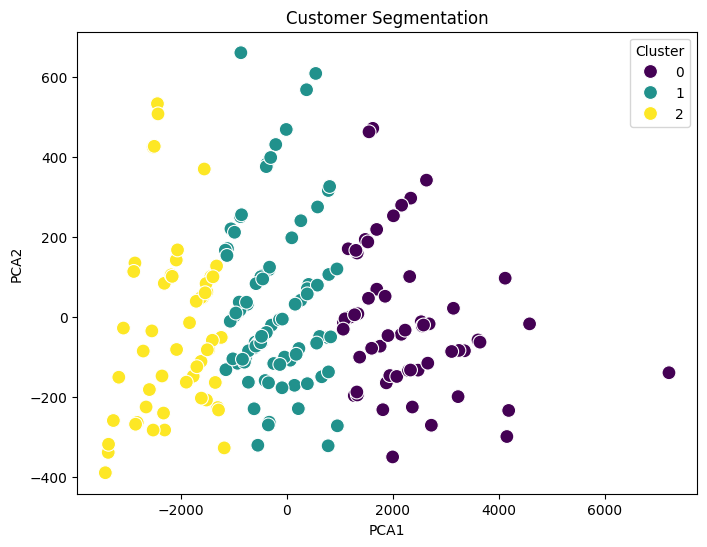

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming you've already done clustering with KMeans and have cluster labels
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data)

# Create a DataFrame with PCA components and cluster labels
cluster_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
cluster_df['Cluster'] = clustering_labels

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.show()
